# Housing Data Analysis
### With data from Zillow, AllTransit, and National Walkability measures
## Nick Cantalupa, Sean Duffy, Zach Becker, and Oviya Gnanasekar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from load_data import load

## Baseline

In [2]:
df = load()
df

RegionID  SizeRankZip  RegionName RegionType State         City  \
0          91982            1       77494        zip    TX         Katy   
1          91940            3       77449        zip    TX         Katy   
2          91733            5       77084        zip    TX      Houston   
3          91926           11       77433        zip    TX      Cypress   
4          92036           25       77573        zip    TX  League City   
...          ...          ...         ...        ...   ...          ...   
124310     59275        28822        3890        zip    NH      Ossipee   
124311     59275        28822        3890        zip    NH      Ossipee   
124312     59275        28822        3890        zip    NH      Ossipee   
124313     59275        28822        3890        zip    NH      Ossipee   
124314     59275        28822        3890        zip    NH      Ossipee   

                                       Metro        CountyName      ZHVI 2003  \
0       Houston-The Woodlands-Sugar Land, TX  Fort Bend County  215776.356117   
1       Houston-The Woodlands-Sugar Land, TX     Harris County  111490.450128   
2       Houston-The Woodlands-Sugar Land, TX     Harris County  109631.516990   
3       Houston-The Woodlands-Sugar Land, TX     Harris County  197878.948831   
4       Houston-The Woodlands-Sugar Land, TX  Galveston County  159151.702851   
...                                      ...               ...            ...   
124310                                   NaN    Carroll County            NaN   
124311                                   NaN    Carroll County            NaN   
124312                                   NaN    Carroll County            NaN   
124313                                   NaN    Carroll County            NaN   
124314                                   NaN    Carroll County            NaN   

            ZHVI 2008  ...  Transit Jobs  Transit Trips/Week  Transit Routes  \
0       244120.000781  ...            56                  40             0.0   
1       124187.861811  ...            56                  40             0.0   
2       123577.558321  ...       218,774               1,900             5.0   
3       221744.762112  ...           NaN                 NaN             NaN   
4       190430.187900  ...           NaN                 NaN             NaN   
...               ...  ...           ...                 ...             ...   
124310            NaN  ...           NaN                 NaN             NaN   
124311            NaN  ...           NaN                 NaN             NaN   
124312            NaN  ...           NaN                 NaN             NaN   
124313            NaN  ...           NaN                 NaN             NaN   
124314            NaN  ...           NaN                 NaN             NaN   

        Transit Shed (sq mi)  Transit percentage  Population  Unnamed: 0  \
0                        0.0               0.013      24,783     38085.0   
1                        0.0               0.013      24,783     38107.0   
2                       31.0               0.039   2,439,835     38107.0   
3                        NaN                 NaN         NaN     38107.0   
4                        NaN                 NaN         NaN     38090.0   
...                      ...                 ...         ...         ...   
124310                   NaN                 NaN         NaN     22549.0   
124311                   NaN                 NaN         NaN     22549.0   
124312                   NaN                 NaN         NaN     22549.0   
124313                   NaN                 NaN         NaN     22549.0   
124314                   NaN                 NaN         NaN     22549.0   

       STATEFP  COUNTYFP  NatWalkInd  
0         48.0     157.0    7.968900  
1         48.0     201.0   11.430193  
2         48.0     201.0   11.430193  
3         48.0     201.0   11.430193  
4         48.0     167.0    7.878866  
...        ...       ...  

In [3]:
df.columns

Index(['RegionID', 'SizeRankZip', 'RegionName', 'RegionType', 'State', 'City',
       'Metro', 'CountyName', 'ZHVI 2003', 'ZHVI 2008', 'ZHVI 2013',
       'ZHVI 2018', 'ZHVI 2019', 'ZHVI 2020', 'ZHVI 2021', 'ZHVI 2022',
       'ZHVI 2023', 'ZHVF BaseDate', 'ZHVF 2024-02-29', 'ZHVF 2024-04-30',
       'ZHVF 2025-01-31', 'ZORI 2018', 'ZORI 2019', 'ZORI 2020', 'ZORI 2021',
       'ZORI 2022', 'ZORI 2023', 'SizeRankMSA', 'Sale Listings 2019',
       'Sale Listings 2020', 'Sale Listings 2021', 'Sale Listings 2022',
       'Sale Listings 2023', 'Sales 2013', 'Sales 2018', 'Sales 2019',
       'Sales 2020', 'Sales 2021', 'Sales 2022', 'Sales 2023',
       'Days on Market 2019', 'Days on Market 2020', 'Days on Market 2021',
       'Days on Market 2022', 'Days on Market 2023', 'New Construction 2018',
       'New Construction 2019', 'New Construction 2020',
       'New Construction 2021', 'New Construction 2022',
       'New Construction 2023', 'Transit Rank', 'Transit Score', 'Transit TCI',
  

In [9]:
df_2023 = df[['RegionID', 'SizeRankZip', 'RegionName', 'State', 'City', 'ZHVI 2023', 'ZORI 2023', 'Sale Listings 2023', 'Sales 2023', 'Days on Market 2023', 'New Construction 2023', 'Transit Score', 'Transit Jobs', 'Population', 'NatWalkInd']]
df_2023 = df_2023.dropna(subset=['RegionID', 'SizeRankZip', 'RegionName', 'State', 'City', 'ZHVI 2023', 'ZORI 2023', 'Sale Listings 2023', 'Sales 2023', 'Days on Market 2023', 'New Construction 2023', 'Transit Score', 'Transit Jobs', 'Population', 'NatWalkInd'])
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2683 entries, 0 to 7517
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RegionID               2683 non-null   int64  
 1   SizeRankZip            2683 non-null   int64  
 2   RegionName             2683 non-null   int64  
 3   State                  2683 non-null   object 
 4   City                   2683 non-null   object 
 5   ZHVI 2023              2683 non-null   float64
 6   ZORI 2023              2683 non-null   float64
 7   Sale Listings 2023     2683 non-null   float64
 8   Sales 2023             2683 non-null   float64
 9   Days on Market 2023    2683 non-null   float64
 10  New Construction 2023  2683 non-null   float64
 11  Transit Score          2683 non-null   float64
 12  Transit Jobs           2683 non-null   object 
 13  Population             2683 non-null   object 
 14  NatWalkInd             2683 non-null   float64
dtypes: f

In [10]:
df_2023['Transit Jobs'] = df_2023['Transit Jobs'].str.replace(',', '').astype(float)
df_2023['Population'] = df_2023['Population'].str.replace(',', '').astype(float)
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2683 entries, 0 to 7517
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RegionID               2683 non-null   int64  
 1   SizeRankZip            2683 non-null   int64  
 2   RegionName             2683 non-null   int64  
 3   State                  2683 non-null   object 
 4   City                   2683 non-null   object 
 5   ZHVI 2023              2683 non-null   float64
 6   ZORI 2023              2683 non-null   float64
 7   Sale Listings 2023     2683 non-null   float64
 8   Sales 2023             2683 non-null   float64
 9   Days on Market 2023    2683 non-null   float64
 10  New Construction 2023  2683 non-null   float64
 11  Transit Score          2683 non-null   float64
 12  Transit Jobs           2683 non-null   float64
 13  Population             2683 non-null   float64
 14  NatWalkInd             2683 non-null   float64
dtypes: f

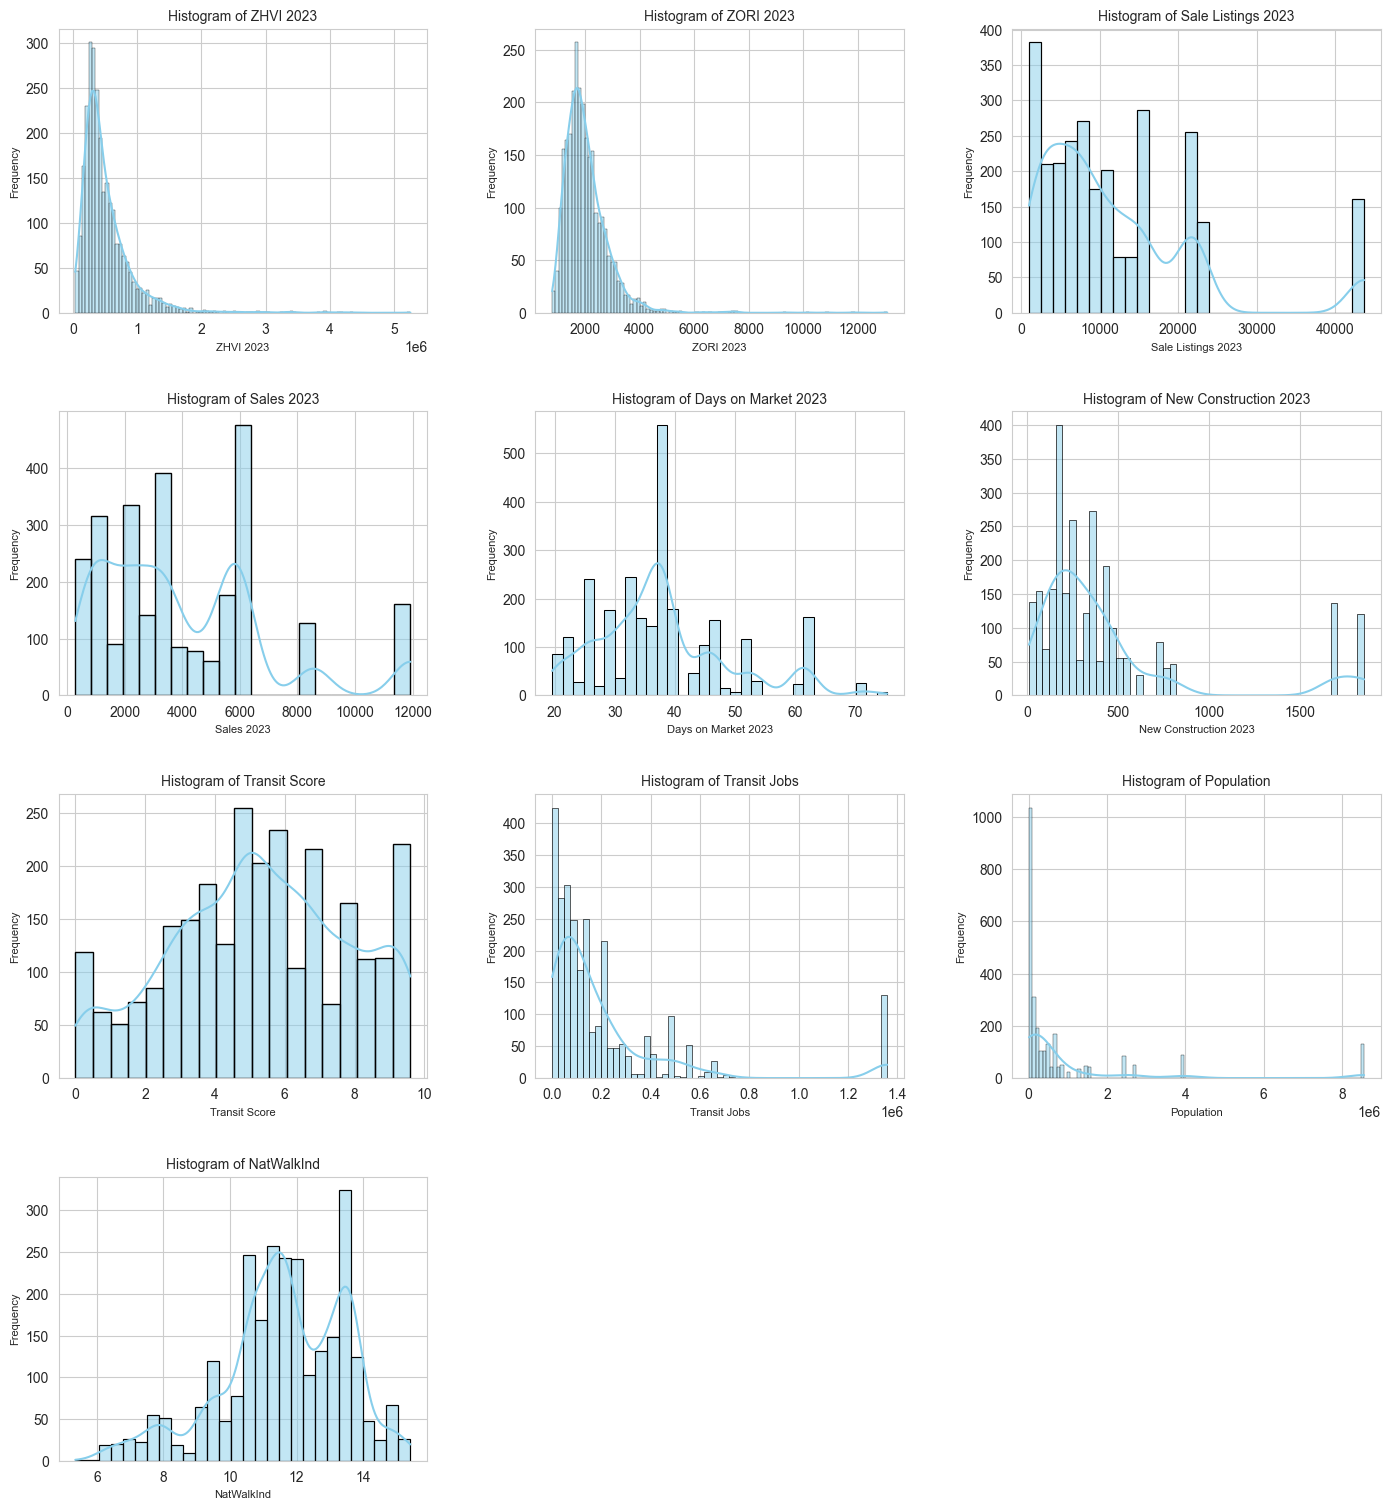

In [13]:
sns.set_style("whitegrid")
numeric_vars = df_2023.select_dtypes(include='number').columns
numeric_vars = [x for x in numeric_vars if x not in ['RegionID', 'SizeRankZip', 'RegionName']]
n_vars = len(numeric_vars)
n_cols = 3
n_rows = n_vars // n_cols + (0 if n_vars % n_cols == 0 else 1)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
fig.tight_layout(pad=5.0)
axes = axes.flatten()
for i, column in enumerate(numeric_vars):
    sns.histplot(data=df_2023, x=column, kde=True, ax=axes[i], color="skyblue", edgecolor="black")
    axes[i].set_title(f'Histogram of {column}', fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)
    axes[i].set_ylabel('Frequency', fontsize=8)
for ax in axes[n_vars:]:
    ax.axis('off')
plt.show()

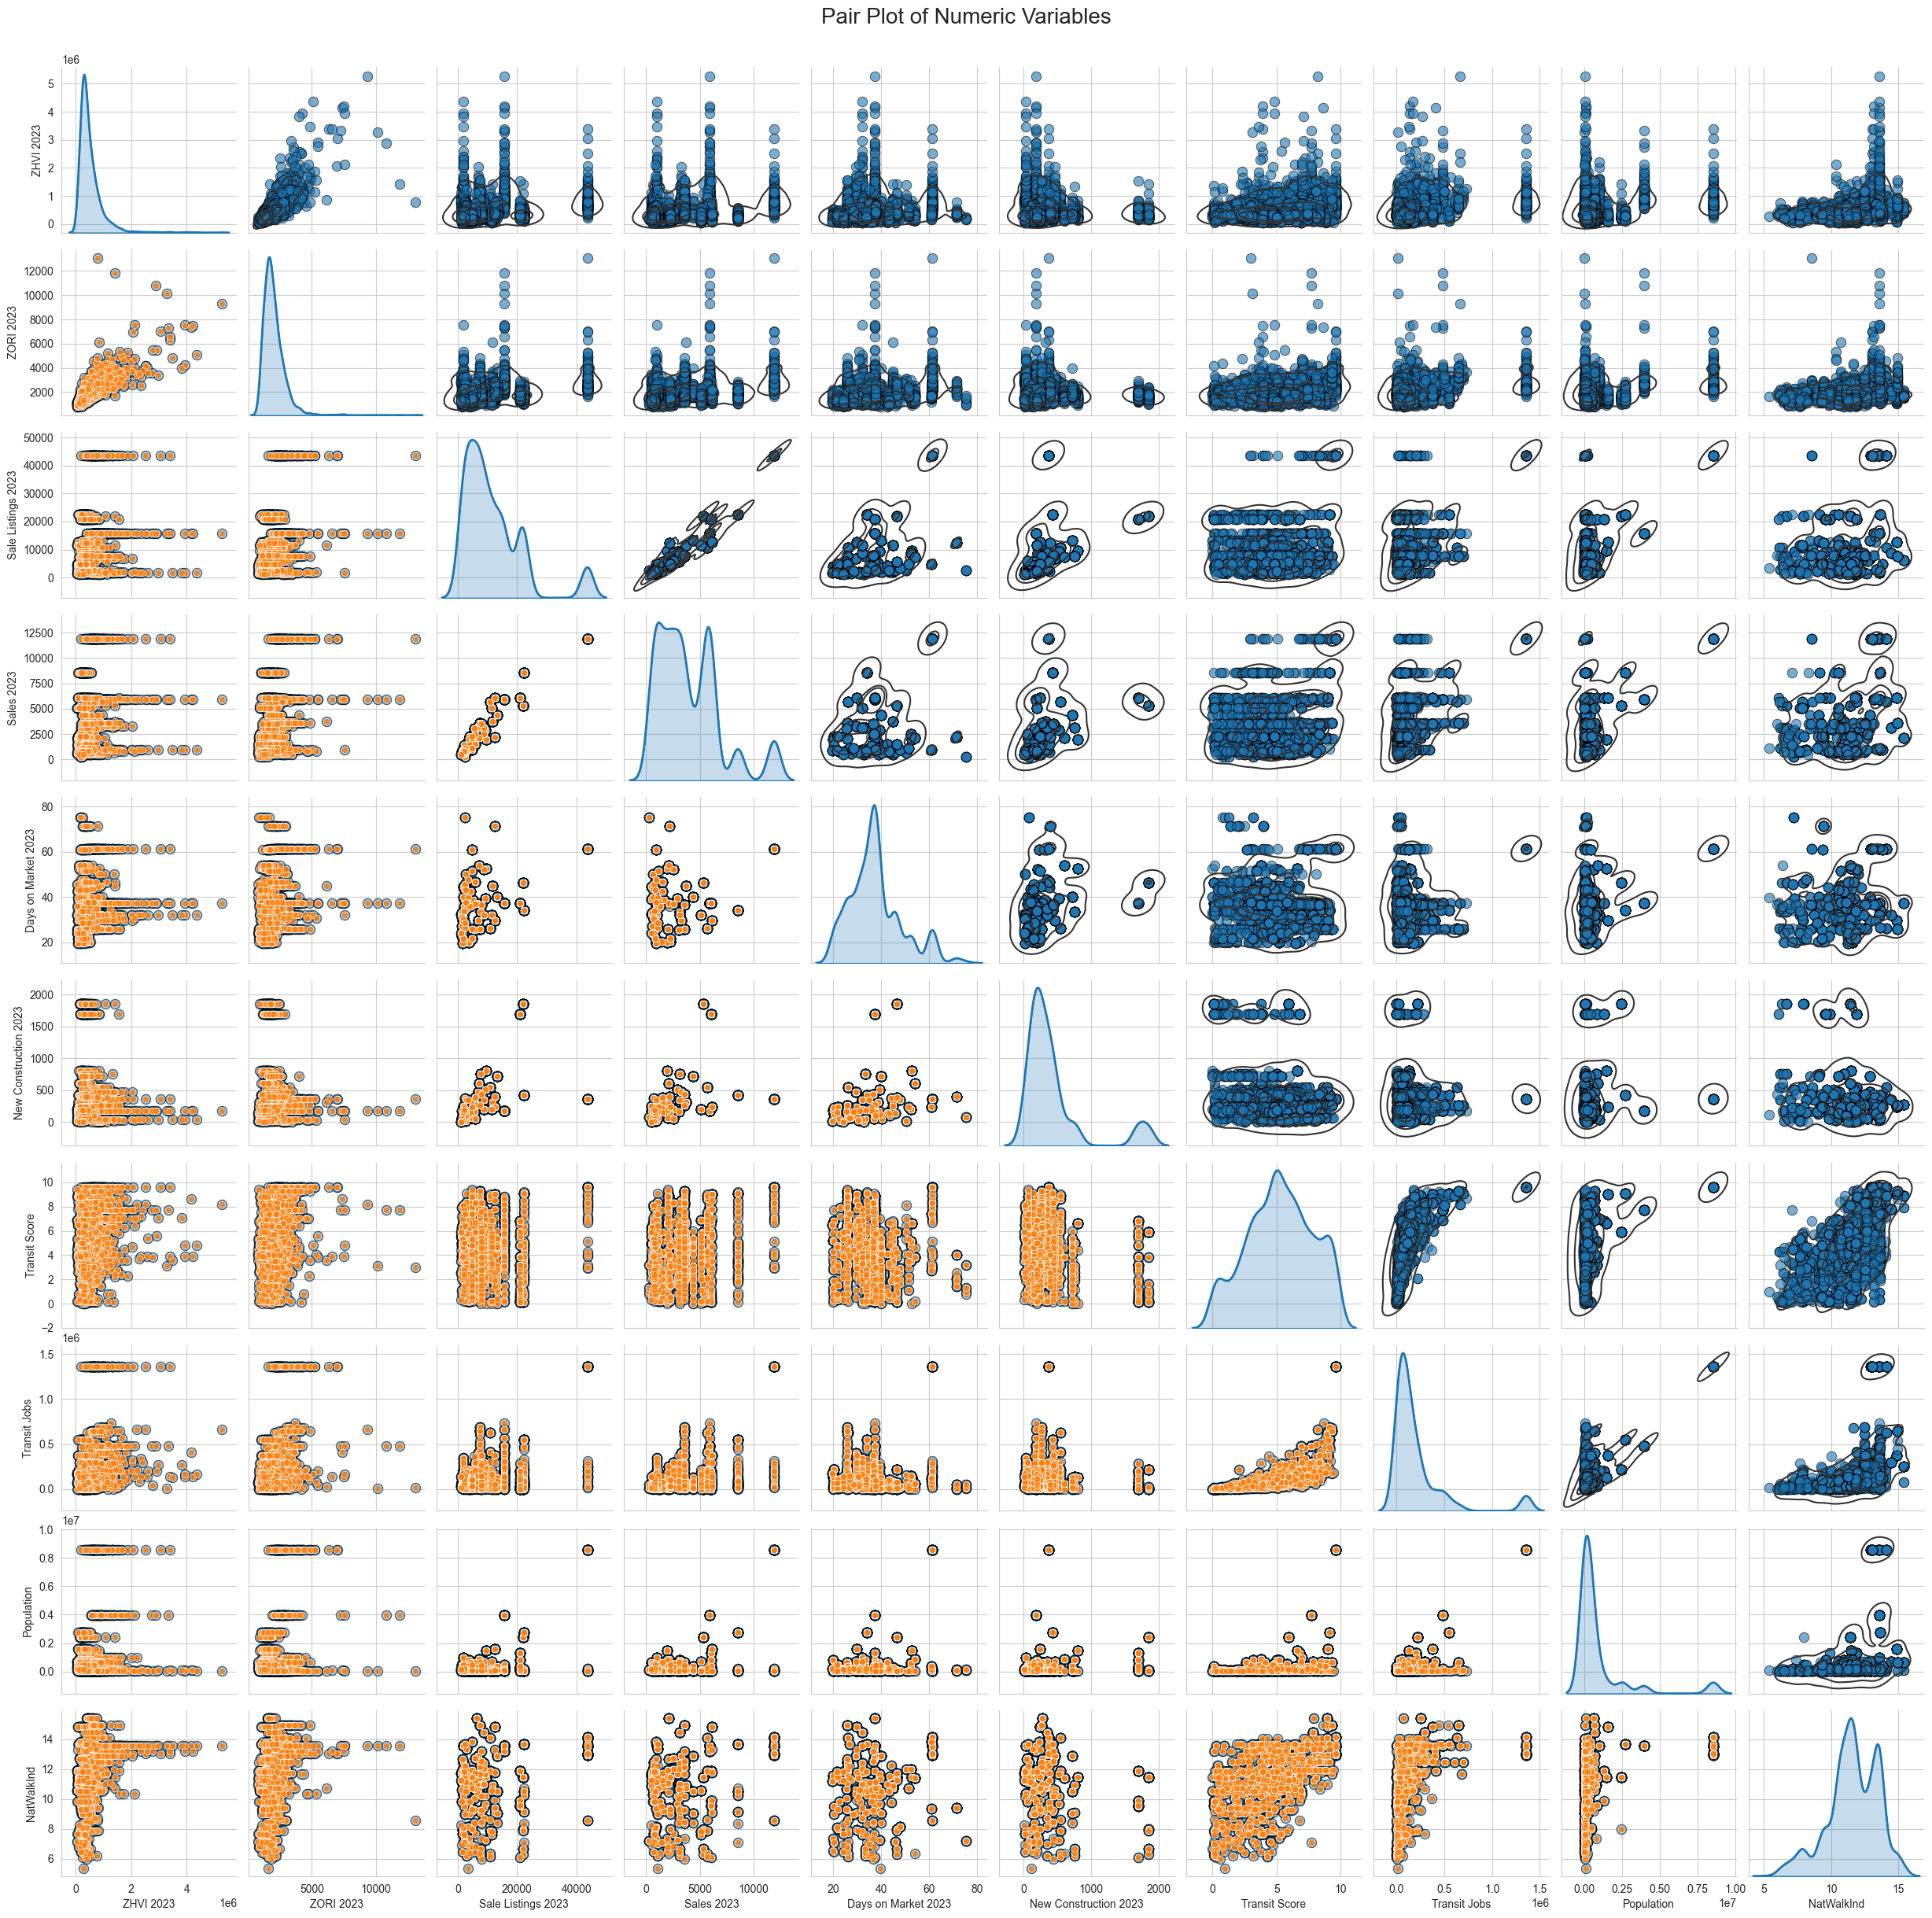

In [15]:
pair_plot = sns.pairplot(df_2023[['ZHVI 2023', 'ZORI 2023', 'Sale Listings 2023', 'Sales 2023', 'Days on Market 2023', 'New Construction 2023', 'Transit Score', 'Transit Jobs', 'Population', 'NatWalkInd']], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=2.5)
pair_plot.map_upper(sns.kdeplot, levels=4, color=".2")
pair_plot.map_lower(sns.scatterplot, alpha=0.8)
pair_plot.map_diag(sns.kdeplot, lw=2, legend=False)
plt.subplots_adjust(top=0.95)
pair_plot.fig.suptitle('Pair Plot of Numeric Variables', fontsize=20)
plt.show()

In [17]:
scaler = MinMaxScaler()
normalized_df_2023 = scaler.fit_transform(df_2023[['ZHVI 2023', 'ZORI 2023', 'Sale Listings 2023', 'Sales 2023', 'Days on Market 2023', 'New Construction 2023', 'Transit Score', 'Transit Jobs', 'Population', 'NatWalkInd']])
normalized_df_2023 = pd.DataFrame(normalized_df_2023)
normalized_df_2023.columns = ['ZHVI 2023', 'ZORI 2023', 'Sale Listings 2023', 'Sales 2023', 'Days on Market 2023', 'New Construction 2023', 'Transit Score', 'Transit Jobs', 'Population', 'NatWalkInd']
normalized_df_2023

ZHVI 2023  ZORI 2023  Sale Listings 2023  Sales 2023  \
0      0.083800   0.087693            0.492728    0.431401   
1      0.046093   0.083430            0.492728    0.431401   
2      0.044730   0.087038            0.492728    0.431401   
3      0.063757   0.084540            0.492728    0.431401   
4      0.061772   0.063130            0.492728    0.431401   
...         ...        ...                 ...         ...   
2678   0.039100   0.039380            0.026997    0.044062   
2679   0.020364   0.027366            0.000000    0.017517   
2680   0.030405   0.054633            0.000000    0.017517   
2681   0.021041   0.026413            0.000000    0.017517   
2682   0.048317   0.042281            0.000000    0.017517   

      Days on Market 2023  New Construction 2023  Transit Score  Transit Jobs  \
0                0.482810               1.000000       0.020833      0.000041   
1                0.482810               1.000000       0.020833      0.000041   
2                0.482810               1.000000       0.614583      0.160960   
3                0.482810               1.000000       0.010417      0.000307   
4                0.482810               1.000000       0.010417      0.000000   
...                   ...                    ...            ...           ...   
2678             0.252616               0.100792       0.520833      0.081662   
2679             0.082212               0.000000       0.031250      0.010293   
2680             0.082212               0.000000       0.614583      0.101317   
2681             0.082212               0.000000       0.614583      0.101317   
2682             0.082212               0.000000       0.614583      0.101317   

      Population  NatWalkInd  
0       0.001698    0.259951  
1       0.001698    0.603935  
2       0.284166    0.603935  
3       0.012147    0.093965  
4       0.005260    0.603935  
...          ...         ...  
2678    0.023860    0.641915  
2679    0.000872    0.288089  
2680    0.015718    0.583979  
2681    0.015718    0.583979  
2682    0.015718    0.583979  

[2683 rows x 10 columns]

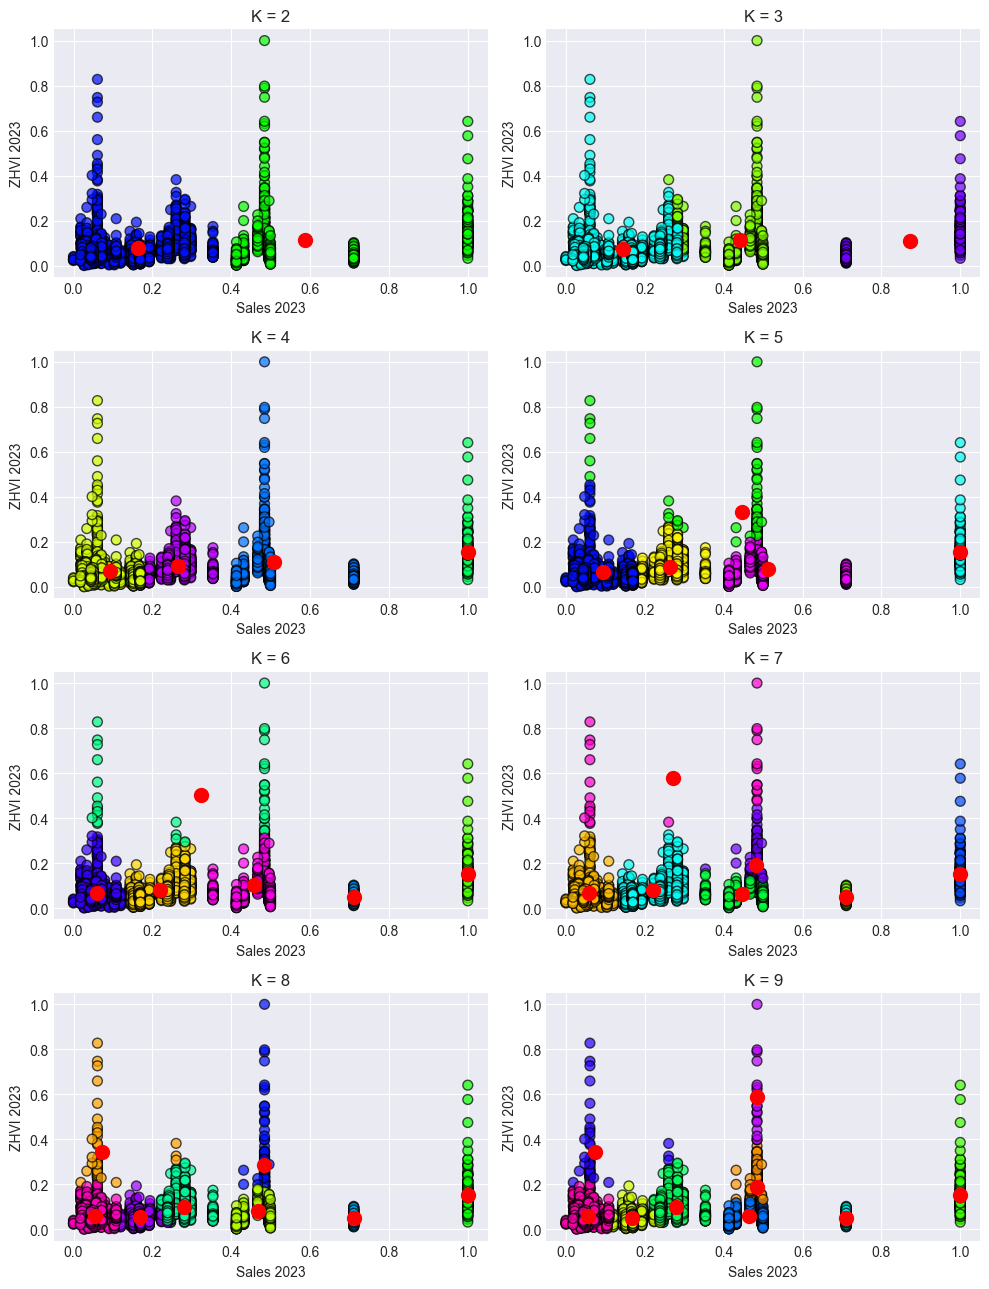

In [60]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 13))
for i, k in enumerate(range(2, 10), 1):
    kmeans = KMeans(n_clusters=k).fit(normalized_df_2023[["Sales 2023", "ZHVI 2023"]])
    plt.subplot(4, 2, i)
    palette = sns.color_palette("hsv", k)
    colors = [palette[x] for x in kmeans.labels_]
    plt.scatter(normalized_df_2023["Sales 2023"], normalized_df_2023['ZHVI 2023'], c=colors, edgecolor='k', s=50, alpha=0.7)
    plt.title(f"K = {k}")
    plt.xlabel('Sales 2023')
    plt.ylabel('ZHVI 2023')
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='o')   
plt.tight_layout()
plt.show()

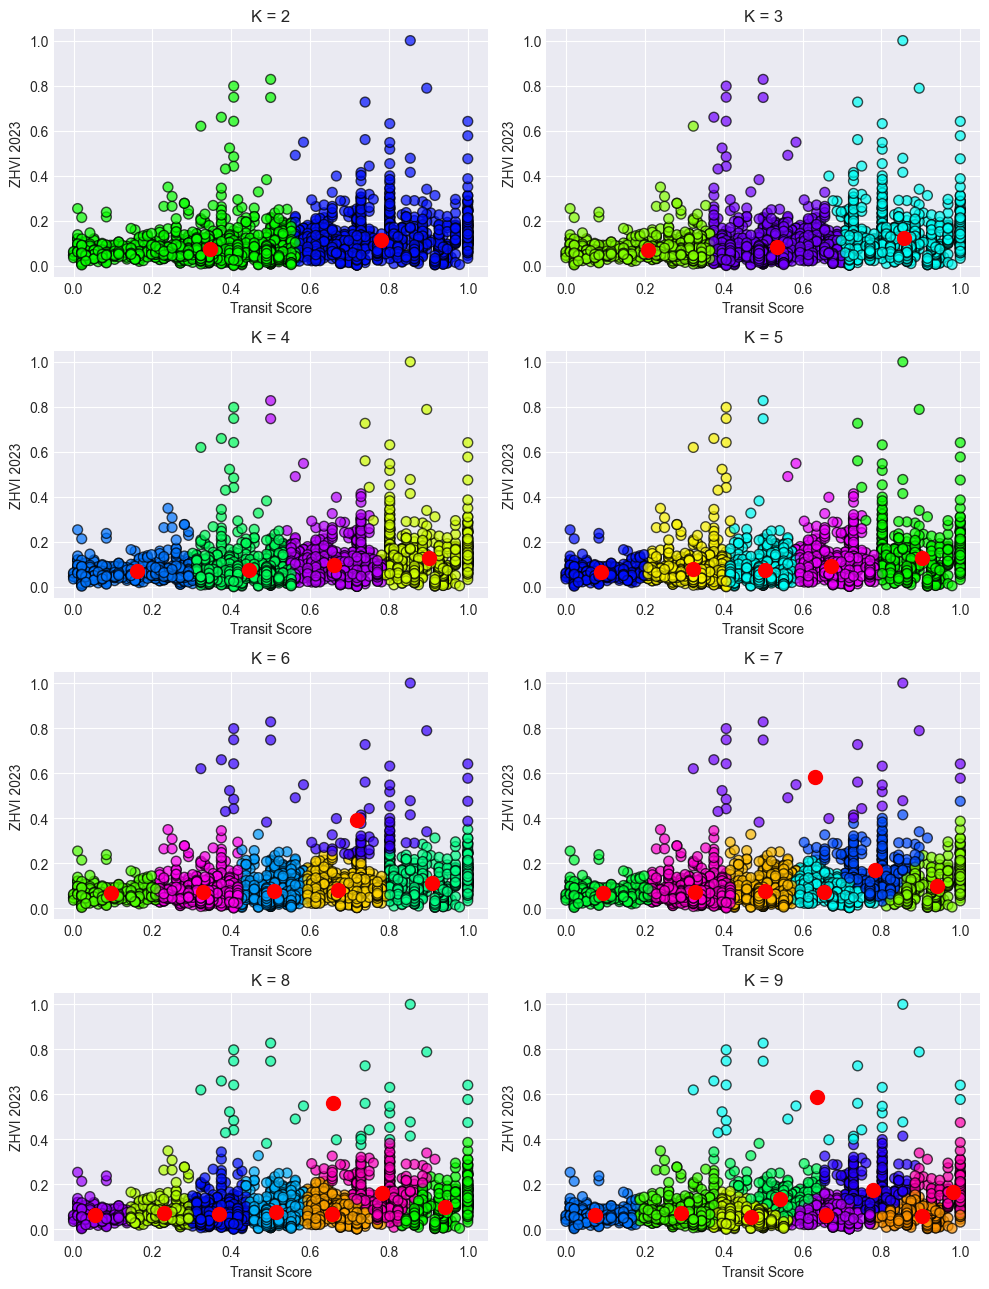

In [49]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 13))
for i, k in enumerate(range(2, 10), 1):
    kmeans = KMeans(n_clusters=k).fit(normalized_df_2023[[ "Transit Score", "ZHVI 2023"]])
    plt.subplot(4, 2, i)
    palette = sns.color_palette("hsv", k)
    colors = [palette[x] for x in kmeans.labels_]
    plt.scatter(normalized_df_2023['Transit Score'], normalized_df_2023['ZHVI 2023'], c=colors, edgecolor='k', s=50, alpha=0.7)
    plt.title(f"K = {k}")
    plt.xlabel('Transit Score')
    plt.ylabel('ZHVI 2023')
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='o')   
plt.tight_layout()
plt.show()

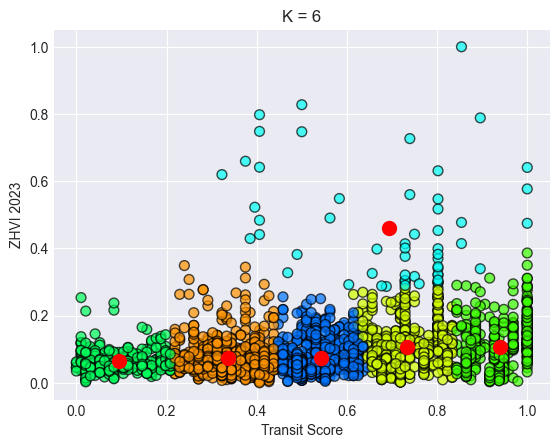

In [66]:
kmeans = KMeans(n_clusters=6).fit(normalized_df_2023[[ "Transit Score", "ZHVI 2023"]])
palette = sns.color_palette("hsv", k)
colors = [palette[x] for x in kmeans.labels_]
plt.scatter(normalized_df_2023['Transit Score'], normalized_df_2023['ZHVI 2023'], c=colors, edgecolor='k', s=50, alpha=0.7)
plt.title(f"K = 6")
plt.xlabel('Transit Score')
plt.ylabel('ZHVI 2023')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='o')

/var/folders/z9/9fp5jhgs2bj9rb5803bf8zmw0000gn/T/ipykernel_80328/2766603949.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(n_clusters, sils, yerr=sils_err, fmt='-o', color='teal', ecolor='lightgray', elinewidth=3, capsize=0, marker='s', markersize=5, linewidth=2)


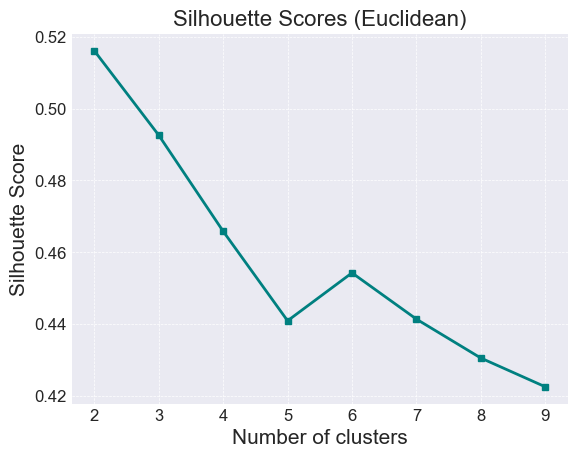

In [64]:
plt.style.use('seaborn-darkgrid')
n_clusters = np.arange(2, 10)
sils = []
sils_err = []
iterations = 5
for n in n_clusters:
    tmp_sil = []
    for _ in range(iterations):
        kmeans = KMeans(n_clusters=n, n_init=10, random_state=42).fit(normalized_df_2023[["Transit Score", "ZHVI 2023"]])
        labels = kmeans.labels_
        sil = silhouette_score(normalized_df_2023[["Transit Score", "ZHVI 2023"]], labels, metric='euclidean')
        tmp_sil.append(sil)
    val = np.mean(tmp_sil)
    err = np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)
plt.errorbar(n_clusters, sils, yerr=sils_err, fmt='-o', color='teal', ecolor='lightgray', elinewidth=3, capsize=0, marker='s', markersize=5, linewidth=2)
plt.title("Silhouette Scores (Euclidean)", fontsize=16)
plt.xticks(n_clusters, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Number of clusters", fontsize=15)
plt.ylabel("Silhouette Score", fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [28]:
normalized_df_2023.columns

Index(['ZHVI 2023', 'ZORI 2023', 'Sale Listings 2023', 'Sales 2023',
       'Days on Market 2023', 'New Construction 2023', 'Transit Score',
       'Transit Jobs', 'Population', 'NatWalkInd'],
      dtype='object')

In [56]:
df_2023["KMeans Full"] = KMeans(n_clusters=6).fit_predict(normalized_df_2023)
df_2023[["City", "KMeans Full"]]

City  KMeans Full
0           Katy            3
1           Katy            3
2        Houston            3
7       Pearland            3
8         Spring            3
...          ...          ...
7451  Des Moines            0
7501      Oswego            4
7503    Syracuse            0
7512    Syracuse            0
7517    Syracuse            0

[2683 rows x 2 columns]

In [72]:
grouped_stats = df_2023.groupby('KMeans Full').agg({
    'Population': ['mean', 'std'],
    'ZHVI 2023': ['mean', 'std'],
    'Transit Score': ['mean', 'std'],
    'Days on Market 2023': ['mean', 'std']
})
print(grouped_stats)

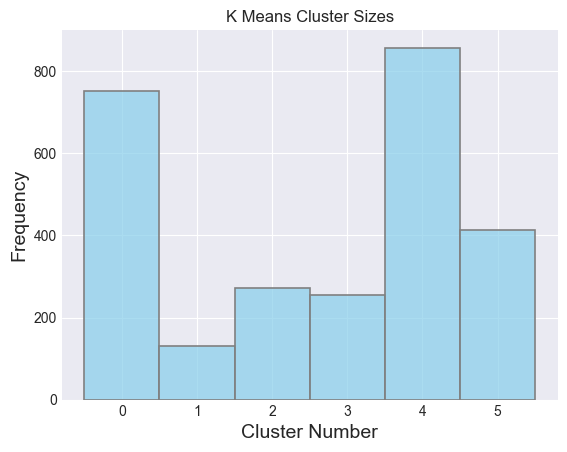

In [67]:
bins_edges = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
sns.histplot(data=df_2023, x="KMeans Full", bins=bins_edges, color='skyblue', edgecolor='gray', linewidth=1.2, alpha=0.7)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=[0, 1, 2, 3, 4, 5])
plt.title("K Means Cluster Sizes")
plt.xlabel('Cluster Number', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()